<a href="https://colab.research.google.com/github/umiSirya/MachineLearning_2/blob/main/TSA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

## What’s the Buzz About Time Series?
Time series is like a diary of data, recorded in sequence over time. Think of time as the independent storyteller, while the dependent variable might be:

1. Stock prices flipping up and down
2. Company sales
3. Smart device sensors giving you the "pulse of tech" 🤖
4. Energy levels in powerhouses—because who doesn’t love a good energy boost? ⚡

To decode the story in time-series data, you break it down into its components: trend, seasonality, cyclic patterns, and irregular fluctuations.

Time series analysis is a statistical technique used to analyze data points gathered at consistent intervals over a time span in order to detect patterns and trends.

TSA represents a series of time-based orders, it would be Years, Months, Weeks, Days, Horus, Minutes, and Seconds. It is an observation from the sequence of discrete time of successive intervals.

## Making Sense of Time: An Airline Example

Imagine you’re analyzing airline passenger data. You notice:

Seasonal Peaks: Families flying during holiday months 🏖️

Trends: Passenger numbers climbing every year (maybe thanks to budget airlines ✈️).

With insights like this, you can explain patterns and make informed decisions!



## How to Analyze Time Series?

We have to follow the following steps:

1. Collecting the data and cleaning it

2. Preparing Visualization with respect to time vs key feature

3. Observing the stationarity of the series

4. Developing charts to understand its nature.

5. Model building – AR, MA, ARMA and ARIMA

6. Extracting insights from prediction

### Time Series 101: The Essentials

## Basic Components of time series

### 1.Seasonality

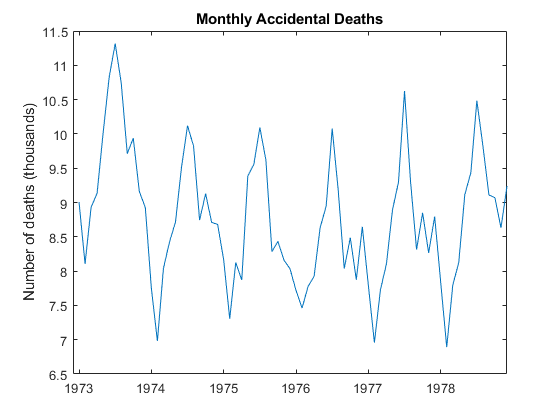

The data shows monthly death records. Every year, there is a noticeable increase in deaths around mid-year. This repeating pattern every year indicates seasonality in the data. In other words, seasonality means there are consistent, repeating patterns over time.


### 2.Trend
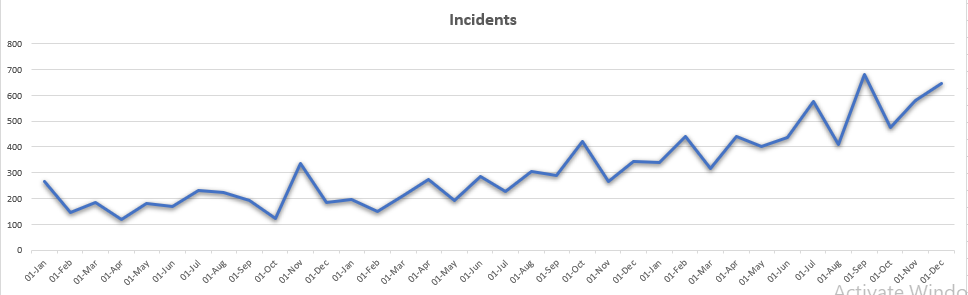

When analyzing this series, we see that the values increase along the vertical axis as we move along the horizontal axis. This indicates a trend, which is the general upward or downward movement over time. In time series modeling, we often remove these trends from the data.


### 3.Cyclic
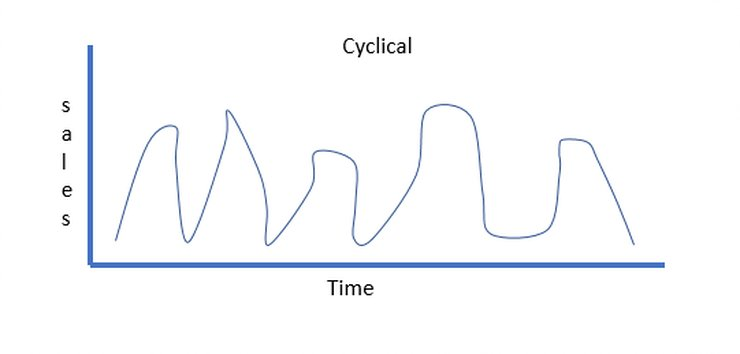

Don't mix up cyclic behavior with seasonality. Seasonality shows predictable patterns at regular intervals, while cyclic variations have peaks and troughs at irregular intervals. The time gaps in cyclic behavior aren't regular. Misunderstanding this can lead to incorrect model choices in time series forecasting.

## Combination
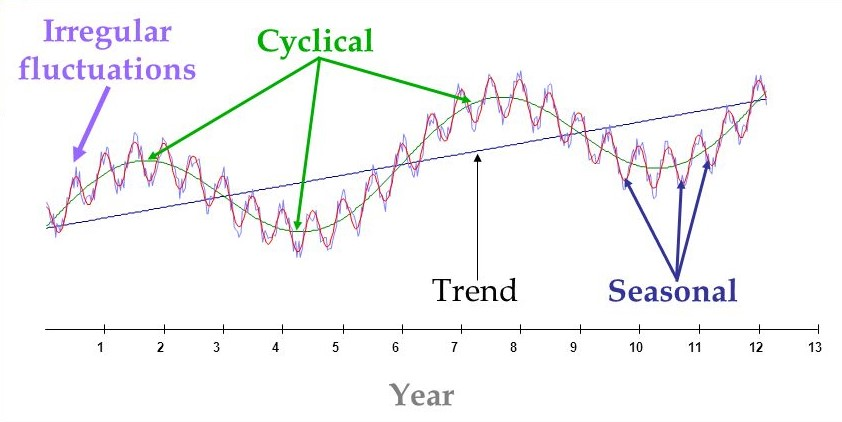

4. **Irregular Fluctuations (Noise):** Random or unpredictable variations in the data that don't follow a pattern. These are the "unexpected" changes that can't be explained by trend, seasonality, or cycles.





## Data Types of Time Series
### Stationary vs Non-Stationary data

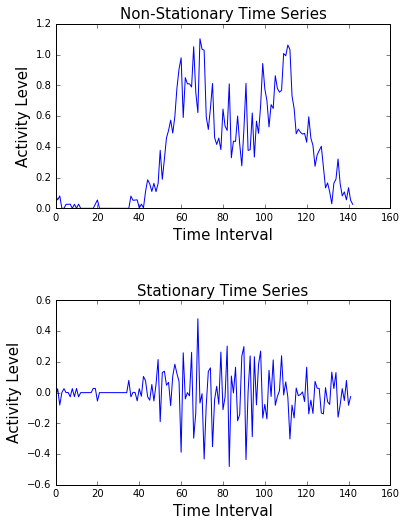

There are different types of time series data: stationary and non-stationary.

 In stationary time series: the mean, variance, and standard deviation remain constant over time.

 In non-stationary time series: these values change. It's important to determine if a time series is stationary because many statistical analyses and models require stationary data.
  If it's not stationary, we can apply transformations to make it so. Tests like the ADF (Augmented Dickey-Fuller) test help check for stationarity.

## Methods to Check for Stationarity
During the TSA model preparation workflow, we must assess whether the dataset is stationary or not.

### Augmented Dickey-Fuller (ADF) Test or Unit Root Test

The ADF test is the most popular statistical test. It is done with the following assumptions:

    Null Hypothesis (H0): Series is non-stationary

    Alternate Hypothesis (HA): Series is stationary
    p-value >0.05 Fail to reject (H0)
    p-value <= 0.05 Accept (H1)

## Converting Non-Stationary into Stationary

For effective time series modeling; there are three methods available for this conversion – detrending, differencing, and transformation.

### Detrending
This process involves removing the trend effects from the dataset to highlight only the differences from the trend. Doing this helps identify cyclical patterns in the data.


### Differencing
This process changes the original time series into a new one, removing its dependence on time. It helps to keep the average value steady, making trends and seasonal effects less noticeable.

### Transformation
There are three methods to transform data: Power Transform, Square Root, and Log Transfer. The Log Transfer method is the most popular.


## Example


### Importing packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the dataset

In [ ]:
#Getting the dataset from kaggle
!kaggle datasets download -d rakannimer/air-passengers

Dataset URL: https://www.kaggle.com/datasets/rakannimer/air-passengers
License(s): DbCL-1.0
  0% 0.00/764 [00:00<?, ?B/s]
100% 764/764 [00:00<00:00, 1.52MB/s]


In [ ]:
import zipfile
zipfile_path = '/content/air-passengers.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [ ]:
air = pd.read_csv('/content/AirPassengers.csv')
air

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


## Data Cleaning

In [ ]:
#Renaming the #Passenger column to Passenger
air.rename(columns={'#Passengers':'Passenger'}, inplace=True)
air

,Month,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
#Setting the month column as index
air.set_index('Month', inplace=True)
air

,Passenger
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


### Visualizing the data

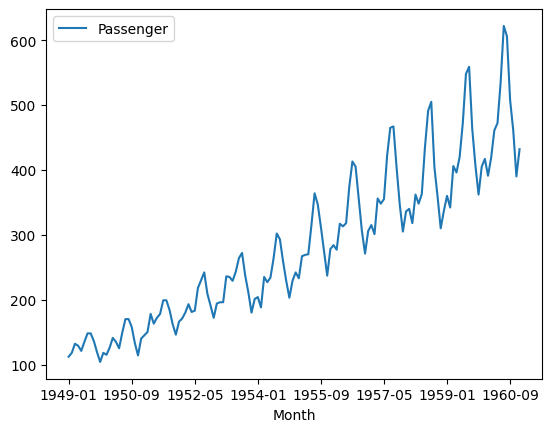

In [ ]:
air.plot()
plt.show()

### Decomposing time series data

#### Seasonal decomposition

Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

We apply an **additive model** when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).

A **multiplicative model** is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

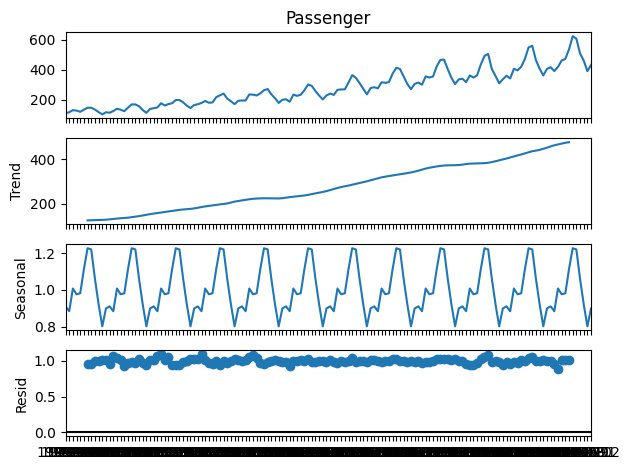

In [ ]:
#decompose the time series
result = seasonal_decompose(air['Passenger'], model='multiplicative', period=12)
result.plot()
plt.show()

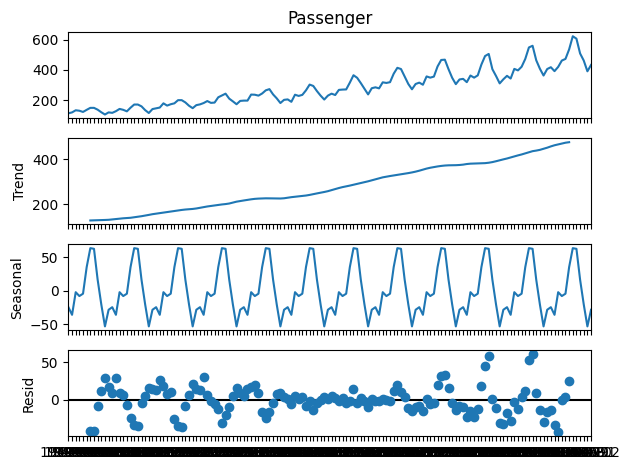

In [ ]:

#decompose the time series
result = seasonal_decompose(air['Passenger'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(air['Passenger'])
print("ADF statistics :%f" % result[0])
print("p-value: %f" % result[1])

ADF statistics :0.815369
p-value: 0.991880


In [ ]:
result

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [ ]:
# Interpretation
adf_statistics = result[0]

if adf_statistics < 0.5:
    print("The time series is stationary (reject null Hypothesis)")

else:
    print("the time seris is not stationary (Fail to reject the null hypothsis)")

the time seris is not stationary (Fail to reject the null hypothsis)


## Smoothing Techniques

**Purpose:** To reduce random noise in a time series, making patterns like trends or seasonality more visible.

**How it Works:** Takes averages or weighted averages of past values.
Common methods include moving averages (MA), exponential smoothing, or low-pass filters.

**When to Use:** When you want to smooth out erratic short-term fluctuations to see longer-term trends or patterns.

**Effect:** Makes the time series less volatile and easier to interpret.

**Example (Simple Moving Average):**
Original Series:
[
100
,
110
,
120
,
130
,
140
]
[100,110,120,130,140]

3-period Moving Average:
[
100
+
110
+
120
3
,
110
+
120
+
130
3
,
120
+
130
+
140
3
]
=
[
110
,
120
,
130
]
[
3
100+110+120
​
 ,
3
110+120+130
​
 ,
3
120+130+140
​
 ]=[110,120,130]

### Moving Average Methodology
The commonly used time series method is the Moving Average. This method is slick with random short-term variations.

**The Moving Average(MA) or Rolling Mean:**
The value of MA is calculated by taking average data of the time-series within k periods.

1. #### Simple Moving Average

The Simple Moving Average (SMA) calculates the average of the last M or N data points. Using more data points (a larger window) makes the average smoother but less accurate for recent changes.
Past observations are weighted equally.


In [ ]:
air['6-month-SMA'] = air['Passenger'].rolling(window=6).mean()
air['12-month-SMA'] = air['Passenger'].rolling(window=12).mean()


In [ ]:
air.head(15)

,Passenger,6-month-SMA,12-month-SMA
Month,,,
1949-01,112,NaN,NaN
1949-02,118,NaN,NaN
1949-03,132,NaN,NaN
1949-04,129,NaN,NaN
1949-05,121,NaN,NaN
1949-06,135,124.500000,NaN
1949-07,148,130.500000,NaN
1949-08,148,135.500000,NaN
1949-09,136,136.166667,NaN


<Axes: xlabel='Month'>

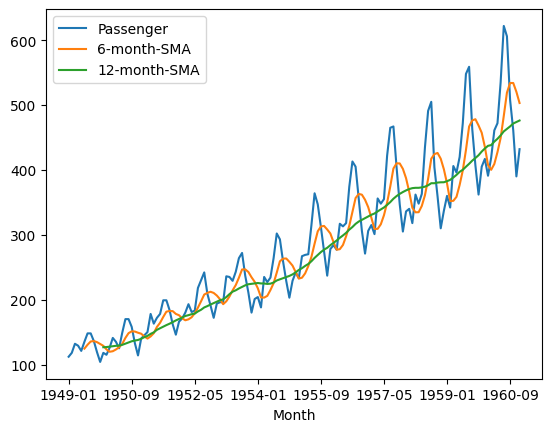

In [ ]:
air.plot()

 #### 2. Exponentially Weighted Moving Average (EWMA)

**Understanding SMA and EWMA**
Simple Moving Average (SMA): Calculates the average of data over a set window (e.g., last 5 days).

**Weaknesses of SMA:**

1. Smaller windows can be noisy.

2. It lags behind the data by the size of the window.

3. Misses full peaks and valleys due to averaging.

4. Only shows past trends, not future behavior.

5. Can be skewed by extreme past values.

**Exponentially Weighted Moving Average (EWMA):**
Reduces the lag by giving more weight to recent data points.

**Benefits of EWMA:**

1. Puts more emphasis on recent data.

2. Faster to react to changes and more sensitive than SMA.

3. Identifies trends and reduces noise better.

Smoothing Factor (α):
 Determines how much weight is given to recent data (value between 0 and 1).

 Alpha (α): The Core Smoothing Factor
What it does: Controls how much weight is given to the most recent data point.

Range:
0
<
𝛼
≤
1
0<α≤1

Higher
𝛼
α: Gives more weight to recent data, making the trend more responsive to changes.

Lower
𝛼
α: Gives less weight to recent data, making the trend smoother but slower to respond.

Analogy: Imagine adjusting the volume on a speaker. A high
𝛼
α is like turning the volume up on recent data, making them more prominent in the trend.

What it does: Span indirectly controls the smoothing by calculating
𝛼
α based on the size of the window.

Analogy: Think of span as the number of "friends" you consult to form an opinion. A larger span means you're considering more friends (more historical data), so you're less swayed by one friend's opinion (less recent weight).

What it does: Halflife represents the number of periods it takes for the weight of a data point to decay to half.

Analogy: Imagine you're forgetting information. Halflife is the time it takes for a memory to fade halfway. Short halflife = faster forgetting, emphasizing recent experiences.

In [ ]:
air['EWMA12'] = air['Passenger'].ewm(span=12,adjust=False).mean()

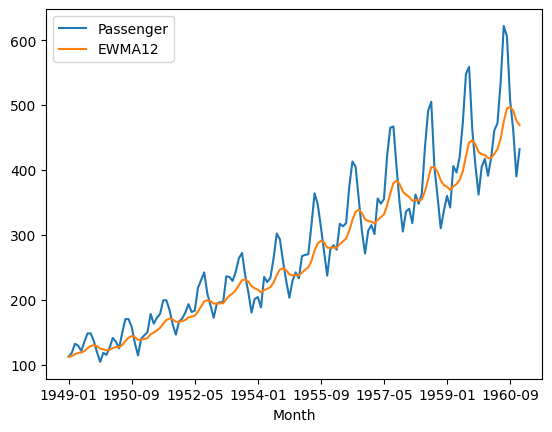

In [ ]:
air[['Passenger','EWMA12']].plot();

**Comparing SMA to EWMA**

In [ ]:
air.head(15)

,Passenger,6-month-SMA,12-month-SMA,EWMA12
Month,,,,
1949-01,112,NaN,NaN,112.000000
1949-02,118,NaN,NaN,112.923077
1949-03,132,NaN,NaN,115.857988
1949-04,129,NaN,NaN,117.879836
1949-05,121,NaN,NaN,118.359861
1949-06,135,124.500000,NaN,120.919883
1949-07,148,130.500000,NaN,125.086055
1949-08,148,135.500000,NaN,128.611277
1949-09,136,136.166667,NaN,129.748004


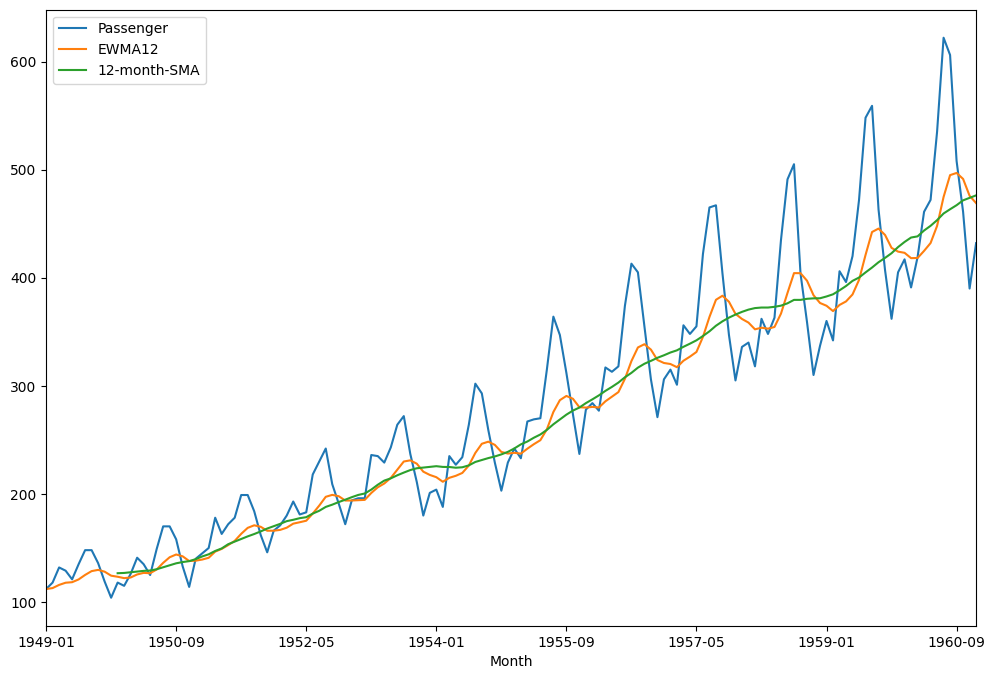

In [ ]:
air[['Passenger','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

The above example employed Simple Exponential Smoothing with one smoothing factor α. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above.

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
ses_model = SimpleExpSmoothing(air['Passenger']).fit(smoothing_level=0.2, optimized=False)
air['SES'] = ses_model.fittedvalues.shift(-1)
air.head(15)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Passenger,6-month-SMA,12-month-SMA,EWMA12,SES
Month,,,,,
1949-01,112,NaN,NaN,112.000000,112.000000
1949-02,118,NaN,NaN,112.923077,113.200000
1949-03,132,NaN,NaN,115.857988,116.960000
1949-04,129,NaN,NaN,117.879836,119.368000
1949-05,121,NaN,NaN,118.359861,119.694400
1949-06,135,124.500000,NaN,120.919883,122.755520
1949-07,148,130.500000,NaN,125.086055,127.804416
1949-08,148,135.500000,NaN,128.611277,131.843533
1949-09,136,136.166667,NaN,129.748004,132.674826


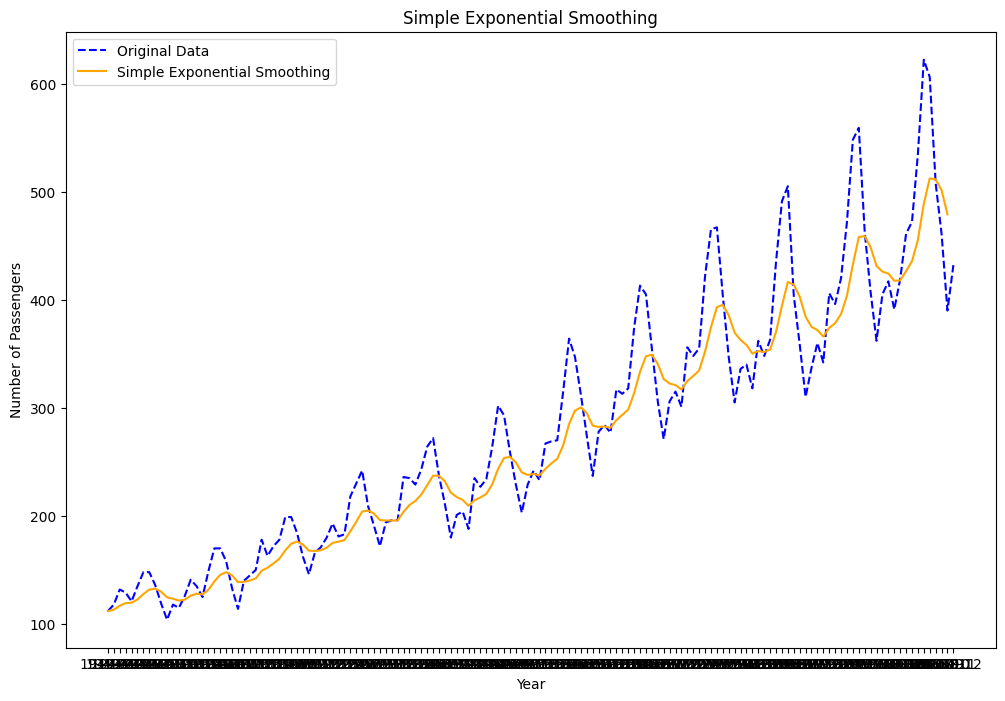

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(air.index, air["Passenger"], label="Original Data", color="blue", linestyle="dashed")
plt.plot(air.index, air["SES"], label="Simple Exponential Smoothing", color="orange")
plt.title("Simple Exponential Smoothing")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()

plt.show()

##### Double Exponential Smoothing (Holt's Method)

Double Exponential Smoothing, also known as Holt's Method, is a technique that helps us smooth out data and make predictions by considering both the level and the trend. Here’s a simplified version:

New Smoothing Factor (Beta): This new factor specifically helps us deal with trends in the data.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
des_model = ExponentialSmoothing(air['Passenger'], trend='add', seasonal=None).fit()
air['DES'] = des_model.fittedvalues.shift(-1)
air.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Passenger,6-month-SMA,12-month-SMA,EWMA12,SES,DES
Month,,,,,,
1949-01,112,NaN,NaN,112.000000,112.0000,114.102394
1949-02,118,NaN,NaN,112.923077,113.2000,120.040657
1949-03,132,NaN,NaN,115.857988,116.9600,134.001539
1949-04,129,NaN,NaN,117.879836,119.3680,131.085845
1949-05,121,NaN,NaN,118.359861,119.6944,123.110263


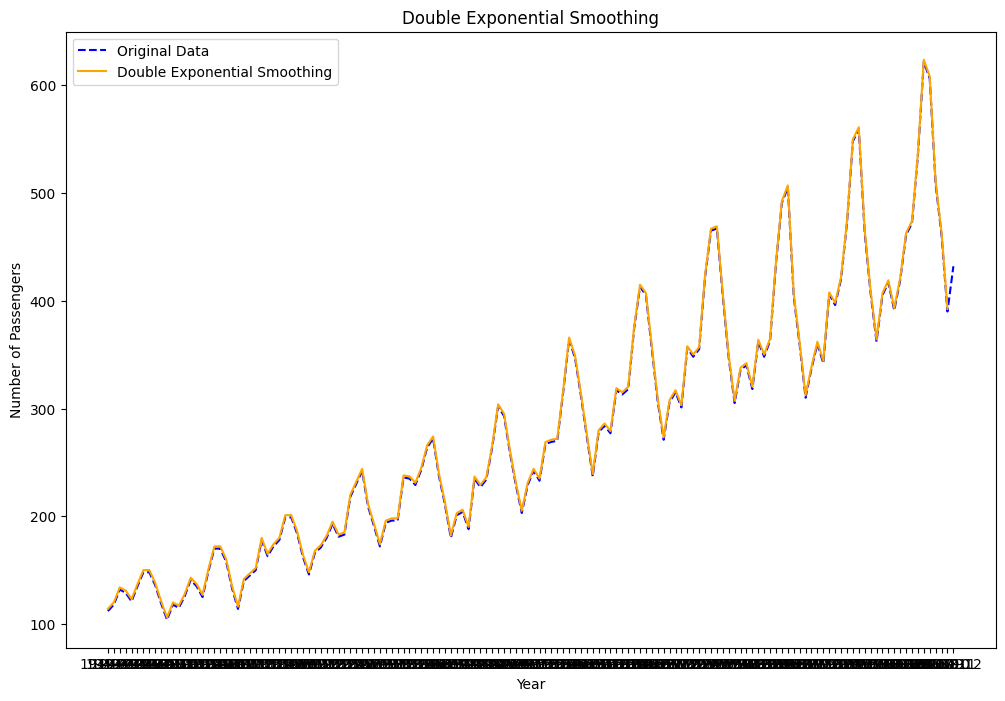

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(air.index, air["Passenger"], label="Original Data", color="blue", linestyle="dashed")
plt.plot(air.index, air["DES"], label="Double Exponential Smoothing", color="orange")
plt.title("Double Exponential Smoothing")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()

plt.show()

##### Triple Exponential Smoothin(Holt-Winters Method)

Triple Exponential Smoothing, or Holt-Winters Method, helps us smooth data by considering the level, trend, and seasonality. Here’s a simplified version:

New Smoothing Factor (Gamma): This factor helps us account for seasonality in the data.

Seasonal Cycles (s): It represents the number of divisions per cycle. For example, in monthly data with a yearly repeating pattern, s would be 12.

Emphasis on Recent Data: Higher values for alpha (α), beta (β), and gamma (γ) (closer to 1) place more emphasis on recent data.

Analogy:
Think of forecasting sales in a candy shop:

Alpha (α): Focuses on the overall average sales.

Beta (β): Adjusts for increasing or decreasing sales trends.

Gamma (γ): Accounts for seasonal spikes, like higher sales during Halloween.

In [ ]:
tes_model = ExponentialSmoothing(air['Passenger'], trend='add', seasonal='add', seasonal_periods=12).fit()
air['TES'] = tes_model.fittedvalues.shift(-1)
air.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,Passenger,6-month-SMA,12-month-SMA,EWMA12,SES,DES,TES
Month,,,,,,,
1949-01,112,NaN,NaN,112.000000,112.0000,114.102394,120.193337
1949-02,118,NaN,NaN,112.923077,113.2000,120.040657,134.676835
1949-03,132,NaN,NaN,115.857988,116.9600,134.001539,131.407263
1949-04,129,NaN,NaN,117.879836,119.3680,131.085845,124.643743
1949-05,121,NaN,NaN,118.359861,119.6944,123.110263,140.427246


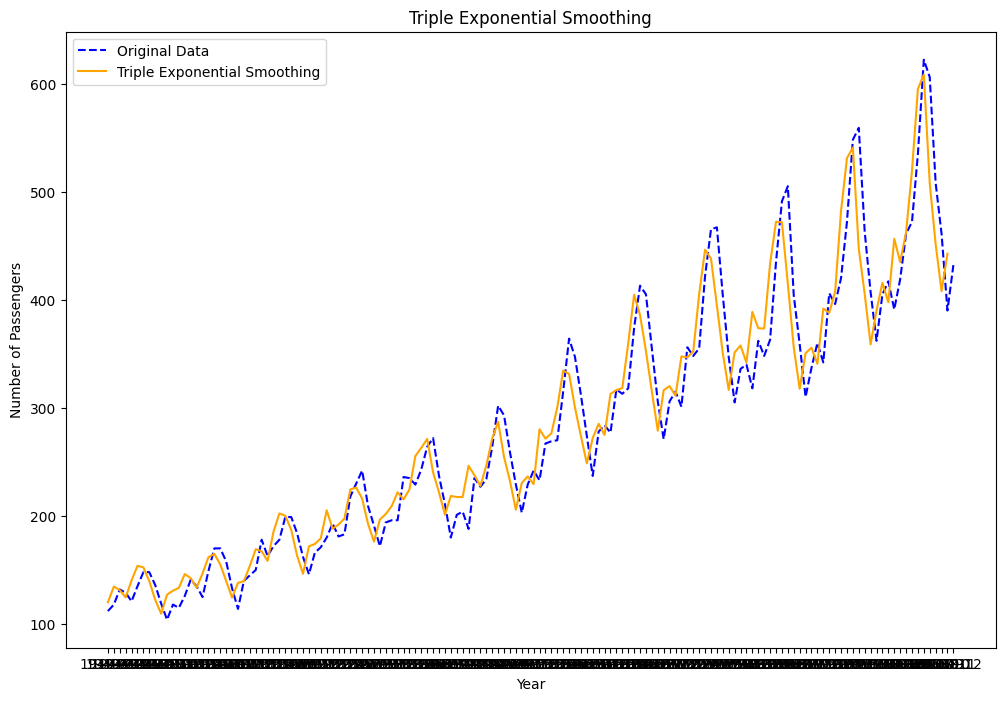

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(air.index, air["Passenger"], label="Original Data", color="blue", linestyle="dashed")
plt.plot(air.index, air["TES"], label="Triple Exponential Smoothing", color="orange")
plt.title("Triple Exponential Smoothing")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()

plt.show()

### ADDITIVE

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


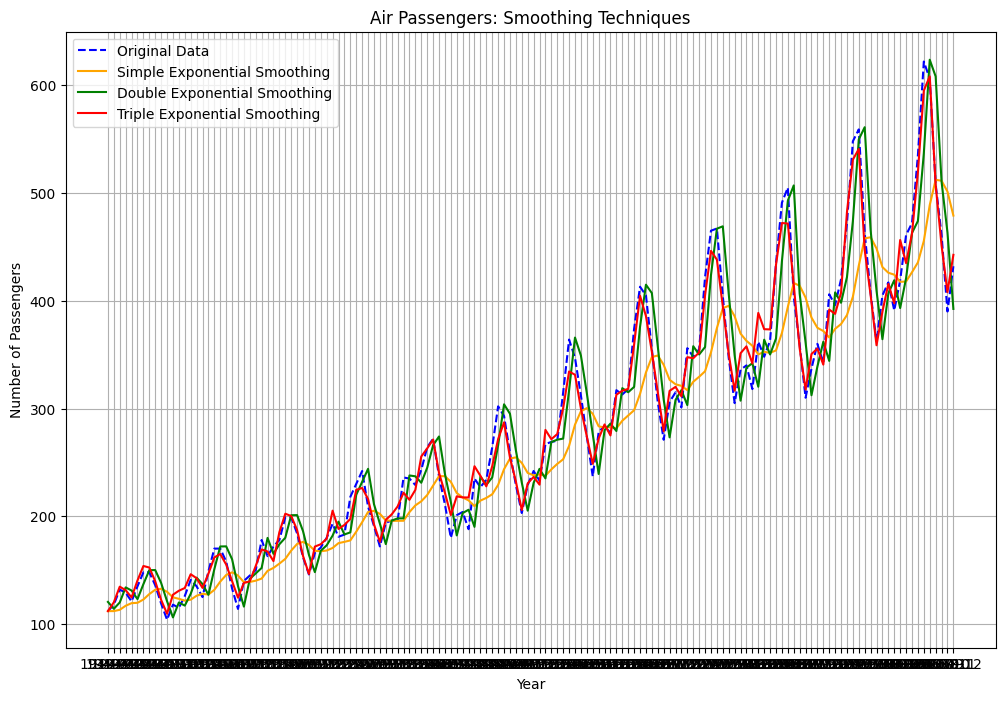

In [ ]:


# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(air["Passenger"]).fit(smoothing_level=0.2, optimized=False)
air["SES"] = ses_model.fittedvalues

# Double Exponential Smoothing (Additive Trend)
des_model = ExponentialSmoothing(air["Passenger"], trend="add", seasonal=None).fit()
air["DES"] = des_model.fittedvalues

# Triple Exponential Smoothing (Additive Trend and Additive Seasonality)
tes_model = ExponentialSmoothing(air["Passenger"], trend="add", seasonal="add", seasonal_periods=12).fit()
air["TES"] = tes_model.fittedvalues

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(air.index, air["Passenger"], label="Original Data", color="blue", linestyle="dashed")
plt.plot(air.index, air["SES"], label="Simple Exponential Smoothing", color="orange")
plt.plot(air.index, air["DES"], label="Double Exponential Smoothing", color="green")
plt.plot(air.index, air["TES"], label="Triple Exponential Smoothing", color="red")
plt.title("Air Passengers: Smoothing Techniques")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()


### MULTIPLICATIVE

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


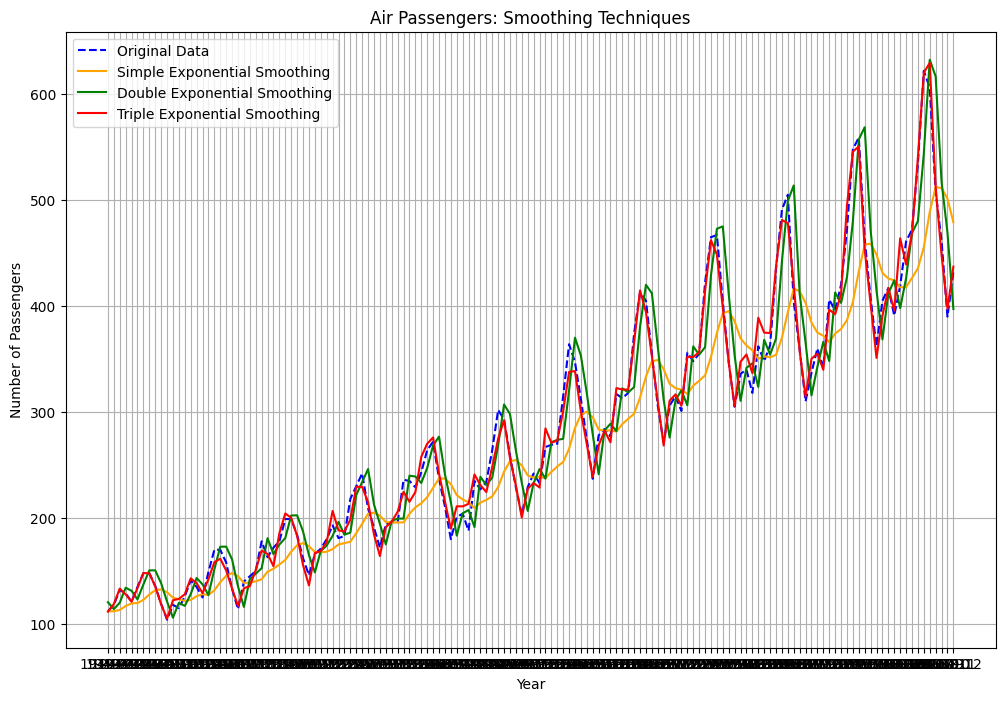

In [ ]:


# Simple Exponential Smoothing
ses_model = SimpleExpSmoothing(air["Passenger"]).fit(smoothing_level=0.2, optimized=False)
air["SES"] = ses_model.fittedvalues

# Double Exponential Smoothing (Additive Trend)
des_model = ExponentialSmoothing(air["Passenger"], trend="mul", seasonal=None).fit()
air["DES"] = des_model.fittedvalues

# Triple Exponential Smoothing (Additive Trend and Additive Seasonality)
tes_model = ExponentialSmoothing(air["Passenger"], trend="mul", seasonal="mul", seasonal_periods=12).fit()
air["TES"] = tes_model.fittedvalues

# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(air.index, air["Passenger"], label="Original Data", color="blue", linestyle="dashed")
plt.plot(air.index, air["SES"], label="Simple Exponential Smoothing", color="orange")
plt.plot(air.index, air["DES"], label="Double Exponential Smoothing", color="green")
plt.plot(air.index, air["TES"], label="Triple Exponential Smoothing", color="red")
plt.title("Air Passengers: Smoothing Techniques")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.grid()
plt.show()


## Models in Time Series Analysis (TSA)

### Models
Models help us understand and predict time series data using three components: **p, d, and q.**

**p (Autoregressive Lags):**

Think of it like looking back at the last few days to predict today's weather.

**d (Difference in the Order):**      

This is the step where we make the series stationary by differencing, like subtracting yesterday's temperature from today's.

**q (Moving Average Lags):**    

 This averages out the random shocks from past days to make predictions smoother.

##### **Autocorrelation Function (ACF)**
ACF measures how current values in a time series relate to past values. Imagine ACF as looking at ripples in a pond: it tells us how strongly the current ripple (data point) is related to the ripples that came before.

Python's Statsmodels Library: This library calculates ACF, showing the patterns and how past values influence current values.

##### **Partial Autocorrelation Function (PACF)**
PACF is like ACF but more specific. It measures the direct relationship between a current value and its previous values, removing the indirect effects.

Think of it as focusing only on the direct link between two ripples in a pond, ignoring the ripples created by other stones (other values).

**ACF (Autocorrelation Function) Plot:**

**Definition:** Measures the correlation between a time series and its past values.

**Interpreting ACF:**

**Y-axis:** Shows correlation (from -1 to 1).

**X-axis:** Shows lag (number of time steps back).

Significant Lags: Look for lags where the correlation isn't zero, indicated by horizontal dashed lines.

**Decay Patterns:**

1. Exponential Decay: Suggests AR (AutoRegressive) process.

2. Sinusoidal Pattern: Suggests seasonality.

3. Cut-off: Indicates MA (Moving Average) process.

**PACF (Partial Autocorrelation Function) Plot:**

**Definition:** Measures the correlation between a time series and its lagged values, controlling for shorter lags.

**Interpreting PACF:**

**Y-axis:** Shows partial correlation.

**X-axis:** Shows lag.

Significant Lags: Similar to ACF, look for non-zero lags.

**Patterns:**

1. Cut-off after few lags: Indicates AR process.

2. Gradual decay: Suggests MA process.

**General Guidelines:**

ARIMA Model Identification: Use ACF and PACF plots to identify AR (p) and MA (q) components.

Stationarity: Ensure the series is stationary; if not, difference it or apply transformations.

Seasonality: Look for periodic spikes in ACF and PACF for seasonal lags (e.g., every 12 months for monthly data).

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

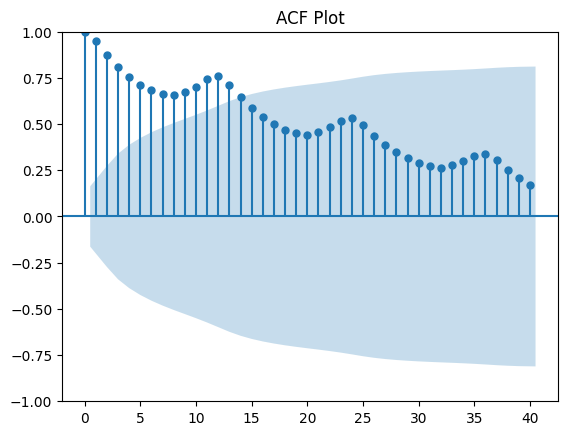

In [ ]:
# Creating an acfplot
plot_acf(air['Passenger'], lags=40)
plt.title("ACF Plot")
plt.show()

In [ ]:
!pip install statsmodels

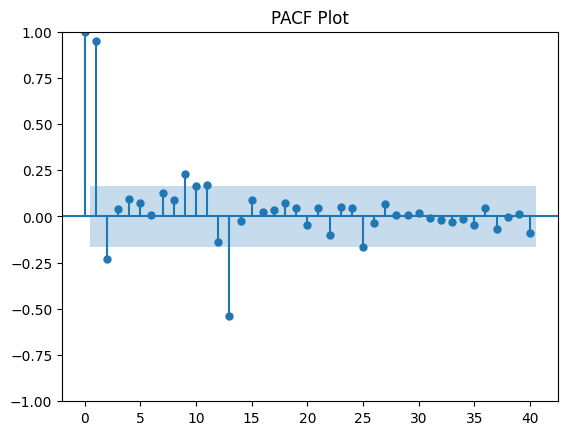

In [ ]:
# Creating an acfplot
plot_pacf(air['Passenger'], lags=40)
plt.title("PACF Plot")
plt.show()

### Auto-Regressive (AR) Models

##### What is an AR Model?
Think of it as looking back to move forward: It predicts future values based on past patterns.

Useful when there’s a clear relationship between past and future data points.

It's like linear regression, but the inputs are lagged versions of the same data (e.g., yesterday’s value predicts today’s).

**AR=Constant+Weighted Sum of Past Values (Lags)+Random Error (Noise) **

The current value of the series depends on a constant, a linear combination of its past values, and some random error.

Example: Predicting today's temperature using temperatures from the last few days.




## AR Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model_ar = ARIMA(train, order=(2, 0, 0))
results = model_ar.fit()
results.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Passenger   No. Observations:                  144
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -702.819
Date:                Thu, 09 Jan 2025   AIC                           1413.639
Time:                        00:02:33   BIC                           1425.518
Sample:                    01-01-1949   HQIC                          1418.466
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2991     54.518      5.141      0.000     173.445     387.153
ar.L1          1.2831      0.079     16.316      0.000       1.129       1.437
ar.L2         -0.3322      0.082     -4.054      0.000      -0.493      -0.172
sigma2       995.9158    110.760      8.992      0.000     778.830    1213.001
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 2.84
Prob(Q):                              0.49   Prob(JB):                         0.24
Heteroskedasticity (H):               6.78   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

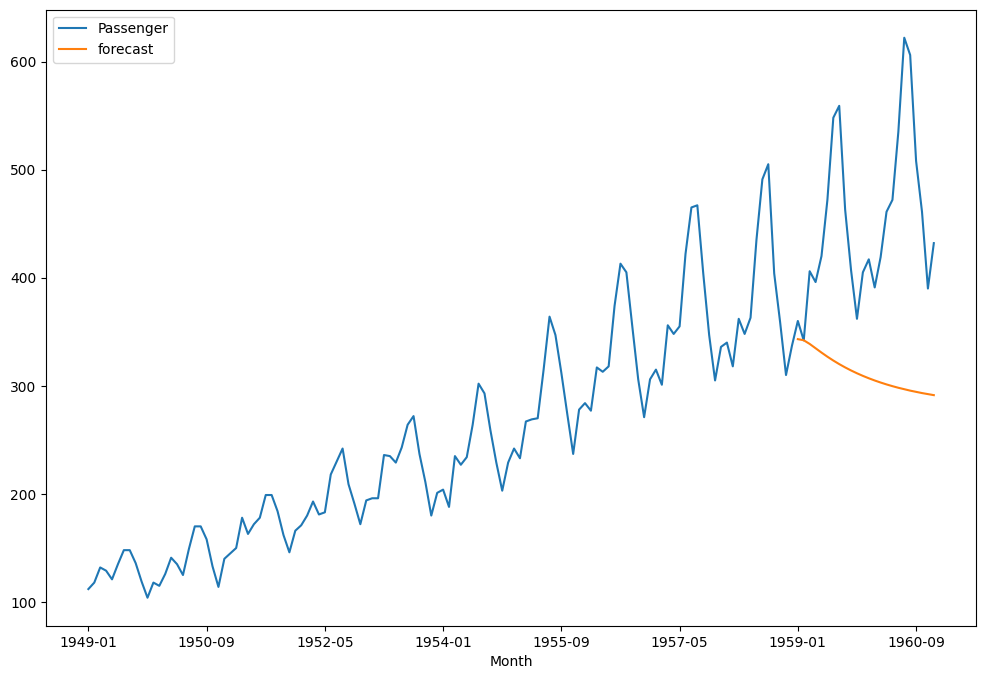

In [ ]:
air['forecast'] = results.predict(start=120, end=200, dynamic=True)
air[['Passenger', 'forecast']].plot(figsize=(12, 8))

## MA

**MA=Constant+Weighted Sum of Past Errors (Shocks)+Random Error (Noise)**

The current value depends on a constant, a linear combination of past forecast errors (residuals), and some random error.

Example: Correcting forecasts using recent deviations between predictions and actuals.


In [ ]:
model_ar = ARIMA(air['Passenger'], order=(0, 0, 1))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model_ar.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Passenger   No. Observations:                  144
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -806.431
Date:                Thu, 09 Jan 2025   AIC                           1618.863
Time:                        00:00:51   BIC                           1627.772
Sample:                    01-01-1949   HQIC                          1622.483
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6501     11.649     24.092      0.000     257.818     303.482
ma.L1          0.9642      0.030     32.217      0.000       0.906       1.023
sigma2      4205.2248    586.724      7.167      0.000    3055.267    5355.182
===================================================================================
Ljung-Box (L1) (Q):                  88.26   Jarque-Bera (JB):                 9.03
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.63   Skew:                             0.60
Prob(H) (two-sided):                  0.10   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

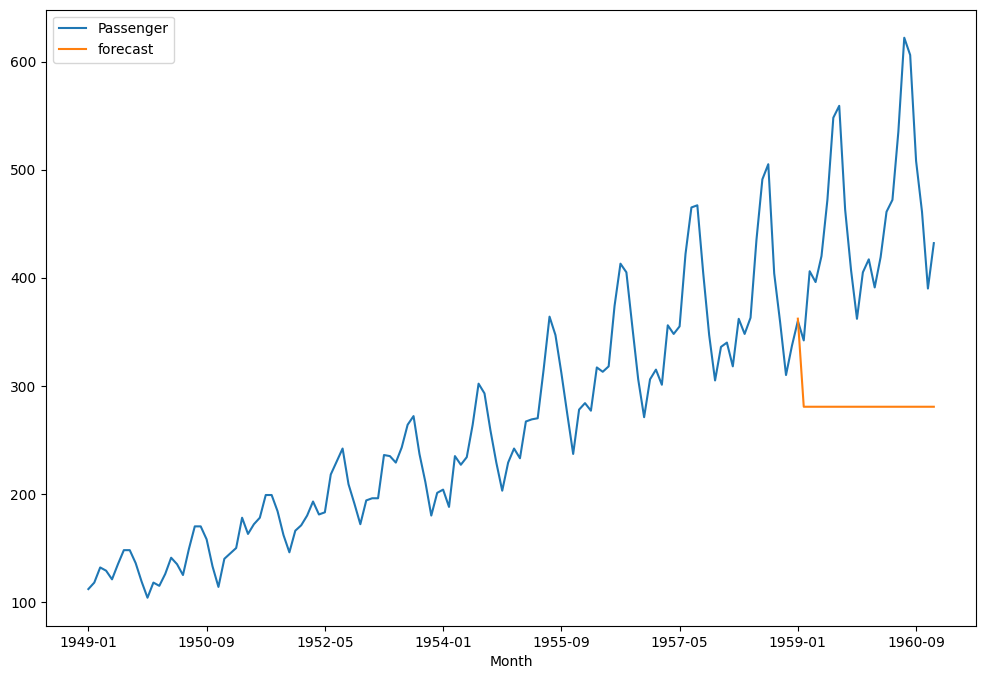

In [ ]:
air['forecast'] = results.predict(start=120, end=200, dynamic=True)
air[['Passenger', 'forecast']].plot(figsize=(12, 8))

##### ARMA

**ARMA**

Combines Auto-Regressive (AR) and Moving Average (MA) models.

**AR:** Uses past values to predict the future.

MA: Uses past errors to predict the future.
Best for stationary series (data with no trend or changing variance).


## ARMA

**ARMA=Constant+Weighted Sum of Past Values (AR)+Weighted Sum of Past Errors (MA)+Random Error**

Combines both AR and MA components, capturing relationships with both past values and past errors.

Example: Forecasting stock prices using both historical prices (AR) and unexpected shocks (MA).

In [ ]:
model_ar = ARIMA(air['Passenger'], order=(1, 0, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model_ar.fit()


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Passenger   No. Observations:                  144
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -700.874
Date:                Wed, 08 Jan 2025   AIC                           1409.749
Time:                        23:52:28   BIC                           1421.628
Sample:                    01-01-1949   HQIC                          1414.576
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3009     56.644      4.948      0.000     169.281     391.321
ar.L1          0.9373      0.028     34.009      0.000       0.883       0.991
ma.L1          0.4264      0.076      5.642      0.000       0.278       0.574
sigma2       968.4365    112.711      8.592      0.000     747.527    1189.346
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.84   Prob(JB):                         0.39
Heteroskedasticity (H):               6.81   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA(Autoregressive Integrated Moving Average)

**ARIMA=Differencing Applied to Series+AR Component+MA Component **

Differencing is applied to the series to remove trends and make it stationary.
Once stationary, the model behaves like an ARMA model with AR and MA terms.

Example: Modeling GDP growth by first removing long-term trends

In [ ]:
model_ar = ARIMA(air['Passenger'], order=(1, 1, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model_ar.fit()


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Passenger   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Wed, 08 Jan 2025   AIC                           1394.683
Time:                        23:52:29   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.000     751.362    1172.492
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 2.14
Prob(Q):                              0.65   Prob(JB):                         0.34
Heteroskedasticity (H):               7.00   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

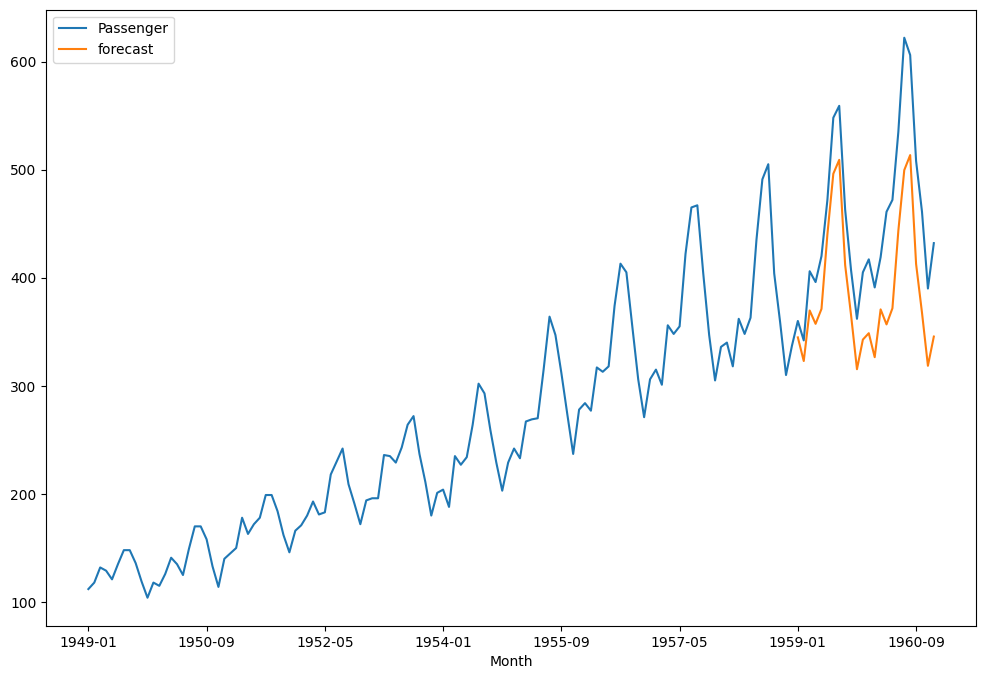

In [ ]:
air['forecast'] = results.predict(start=120, end=200, dynamic=True)
air[['Passenger', 'forecast']].plot(figsize=(12, 8))



**ARIMA:**

 Adds Integration (I) to ARMA, making it handle non-stationary data by differencing.

**AR:** Past values.
**I:** Differencing to make data stationary.
**MA:** Past errors.

*Key Parameters of ARIMA*

**p:** Number of past values (lags).
**d:** Degree of differencing (to make data stationary).
**q:** Moving average window size.

**Steps to Implement ARIMA**

1. Visualize Your Time Series: Understand its patterns.
2. Make Data Stationary:
Remove trends (difference the data).
Apply log transforms if needed.
3. Find AR and MA Components:
Use ACF (Autocorrelation Function) for MA.
Use PACF (Partial Autocorrelation Function) for AR.
4. Build and Fit the Model: Train ARIMA with the best p,d,q.
5. Predict and Evaluate: Forecast values, check residuals, and ensure no important patterns are left.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#Creating sarima model
model_arima = SARIMAX(air['Passenger'], order=(1, 1, 1))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model_arima.fit()


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Passenger   No. Observations:                  144
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -696.464
Date:                Thu, 09 Jan 2025   AIC                           1398.928
Time:                        00:32:43   BIC                           1407.796
Sample:                    01-01-1949   HQIC                          1402.532
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3130      0.100      3.127      0.002       0.117       0.509
ma.L1         -0.9998      5.894     -0.170      0.865     -12.551      10.552
sigma2      1034.0009   6133.239      0.169      0.866    -1.1e+04    1.31e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 4.93
Prob(Q):                              0.45   Prob(JB):                         0.09
Heteroskedasticity (H):               8.37   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

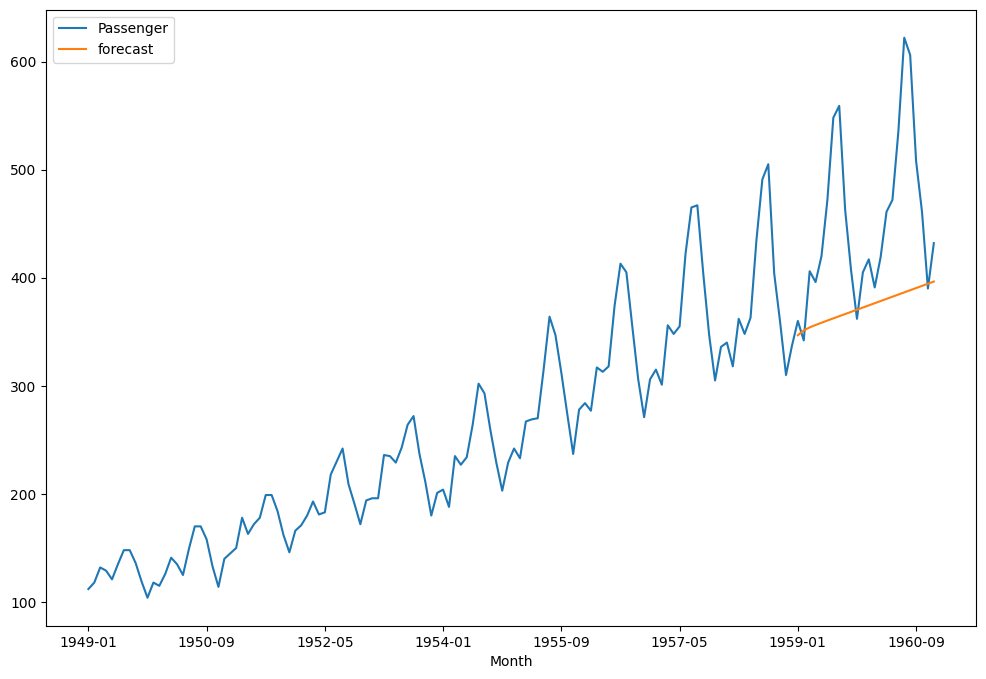

In [ ]:
air['forecast'] = results.predict(start=120, end=200, dynamic=True)
air[['Passenger', 'forecast']].plot(figsize=(12, 8))

## SARIMA

**SARIMA=ARIMA Model+Seasonal AR Terms+Seasonal MA Terms+Seasonal Differencing **

Extends ARIMA by adding seasonal components:
Seasonal AR and MA terms capture patterns that repeat over a fixed period (e.g., monthly, yearly).

Seasonal differencing removes repeating seasonal trends.

Example: Forecasting monthly energy demand with seasonal patterns.

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
#Creating sarima model
model_sarima = SARIMAX(air['Passenger'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results = model_sarima.fit()


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Passenger   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Wed, 08 Jan 2025   AIC                           1022.299
Time:                                    23:58:41   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325     -0.660      0.509      -0.853       0.423
ar.S.L12      -0.9272      0.213     -4.345      0.000      -1.345      -0.509
ma.S.L12       0.8394      0.309      2.719      0.007       0.234       1.445
sigma2       130.7623     15.415      8.483      0.000     100.549     160.975
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.05
Prob(Q):                              0.99   Prob(JB):                         0.03
Heteroskedasticity (H):               2.65   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

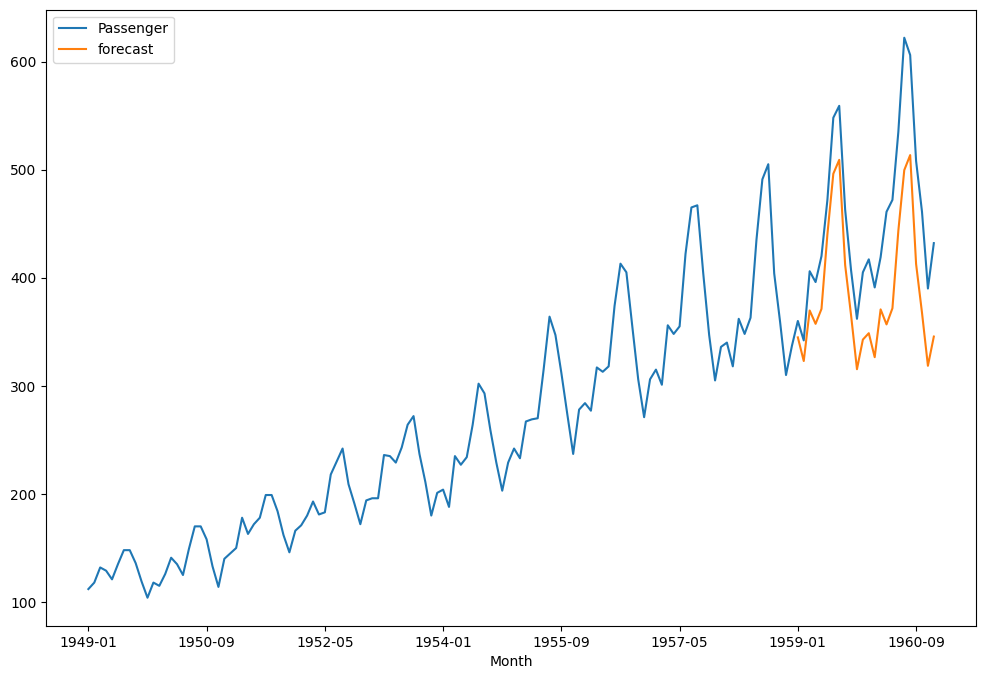

In [ ]:
air['forecast'] = results.predict(start=120, end=200, dynamic=True)
air[['Passenger', 'forecast']].plot(figsize=(12, 8))

### SARIMAX

**SARIMAX=SARIMA Model+Exogenous Variables (External Factors)**

Extends SARIMA by including external explanatory variables (regressors) that influence the series.

Example: Predicting sales with seasonal trends while considering external factors like marketing spend or holidays.

In [ ]:
## Creating SARIMAX Model
model_sarimax = SARIMAX(air['Passenger'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=None)

NameError: name 'SARIMAX' is not defined

In [ ]:

results = model_sarimax.fit()


In [ ]:
results.summary()

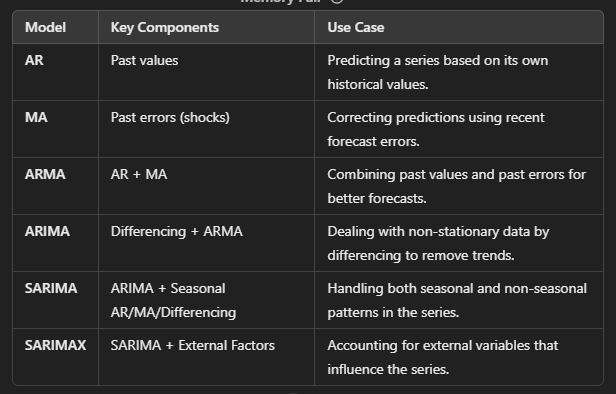